# Kalman Filter

In [4]:

import random

from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
from plotly.subplots import make_subplots
import plotly.express as px
from filterpy.gh import GHFilter
import filterpy as fp
import pandas as pd
print("import ok.")

init()

import ok.
import ok.


In [3]:
import numpy as np
np.random.randn()

0.08864905836807577

In [49]:
measured_weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
time_step = 1.0 # day
scale_factor = 4.0 / 10


In [52]:
def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):
    estimates, predictions = [estimated_weight], []

    for measured_weight in measured_weights:
        # prediction based on previous estimate
        predicted_weight = estimated_weight + gain_rate * time_step
        residual = measured_weight - predicted_weight
        correction = scale_factor * residual
        estimated_weight = predicted_weight + correction

        estimates.append(estimated_weight)
        predictions.append(predicted_weight)

        if do_print:
            print(f"Measured weight: {measured_weight:.2f}, "
                  f"Predicted weight: {predicted_weight:.2f}, "
                  f"Residual: {residual:.2f}, "
                  f"Correction: {correction:.2f}, "
                  f"Estimated weight: {estimated_weight:.2f}")

    return estimates, predictions

initial_estimate = 160.0

estimates, predictions = predict_using_gain_guess(initial_estimate, 1., do_print=True)


Measured weight: 158.00, Predicted weight: 161.00, Residual: -3.00, Correction: -1.20, Estimated weight: 159.80
Measured weight: 164.20, Predicted weight: 160.80, Residual: 3.40, Correction: 1.36, Estimated weight: 162.16
Measured weight: 160.30, Predicted weight: 163.16, Residual: -2.86, Correction: -1.14, Estimated weight: 162.02
Measured weight: 159.90, Predicted weight: 163.02, Residual: -3.12, Correction: -1.25, Estimated weight: 161.77
Measured weight: 162.10, Predicted weight: 162.77, Residual: -0.67, Correction: -0.27, Estimated weight: 162.50
Measured weight: 164.60, Predicted weight: 163.50, Residual: 1.10, Correction: 0.44, Estimated weight: 163.94
Measured weight: 169.60, Predicted weight: 164.94, Residual: 4.66, Correction: 1.86, Estimated weight: 166.80
Measured weight: 167.40, Predicted weight: 167.80, Residual: -0.40, Correction: -0.16, Estimated weight: 167.64
Measured weight: 166.40, Predicted weight: 168.64, Residual: -2.24, Correction: -0.90, Estimated weight: 167.7

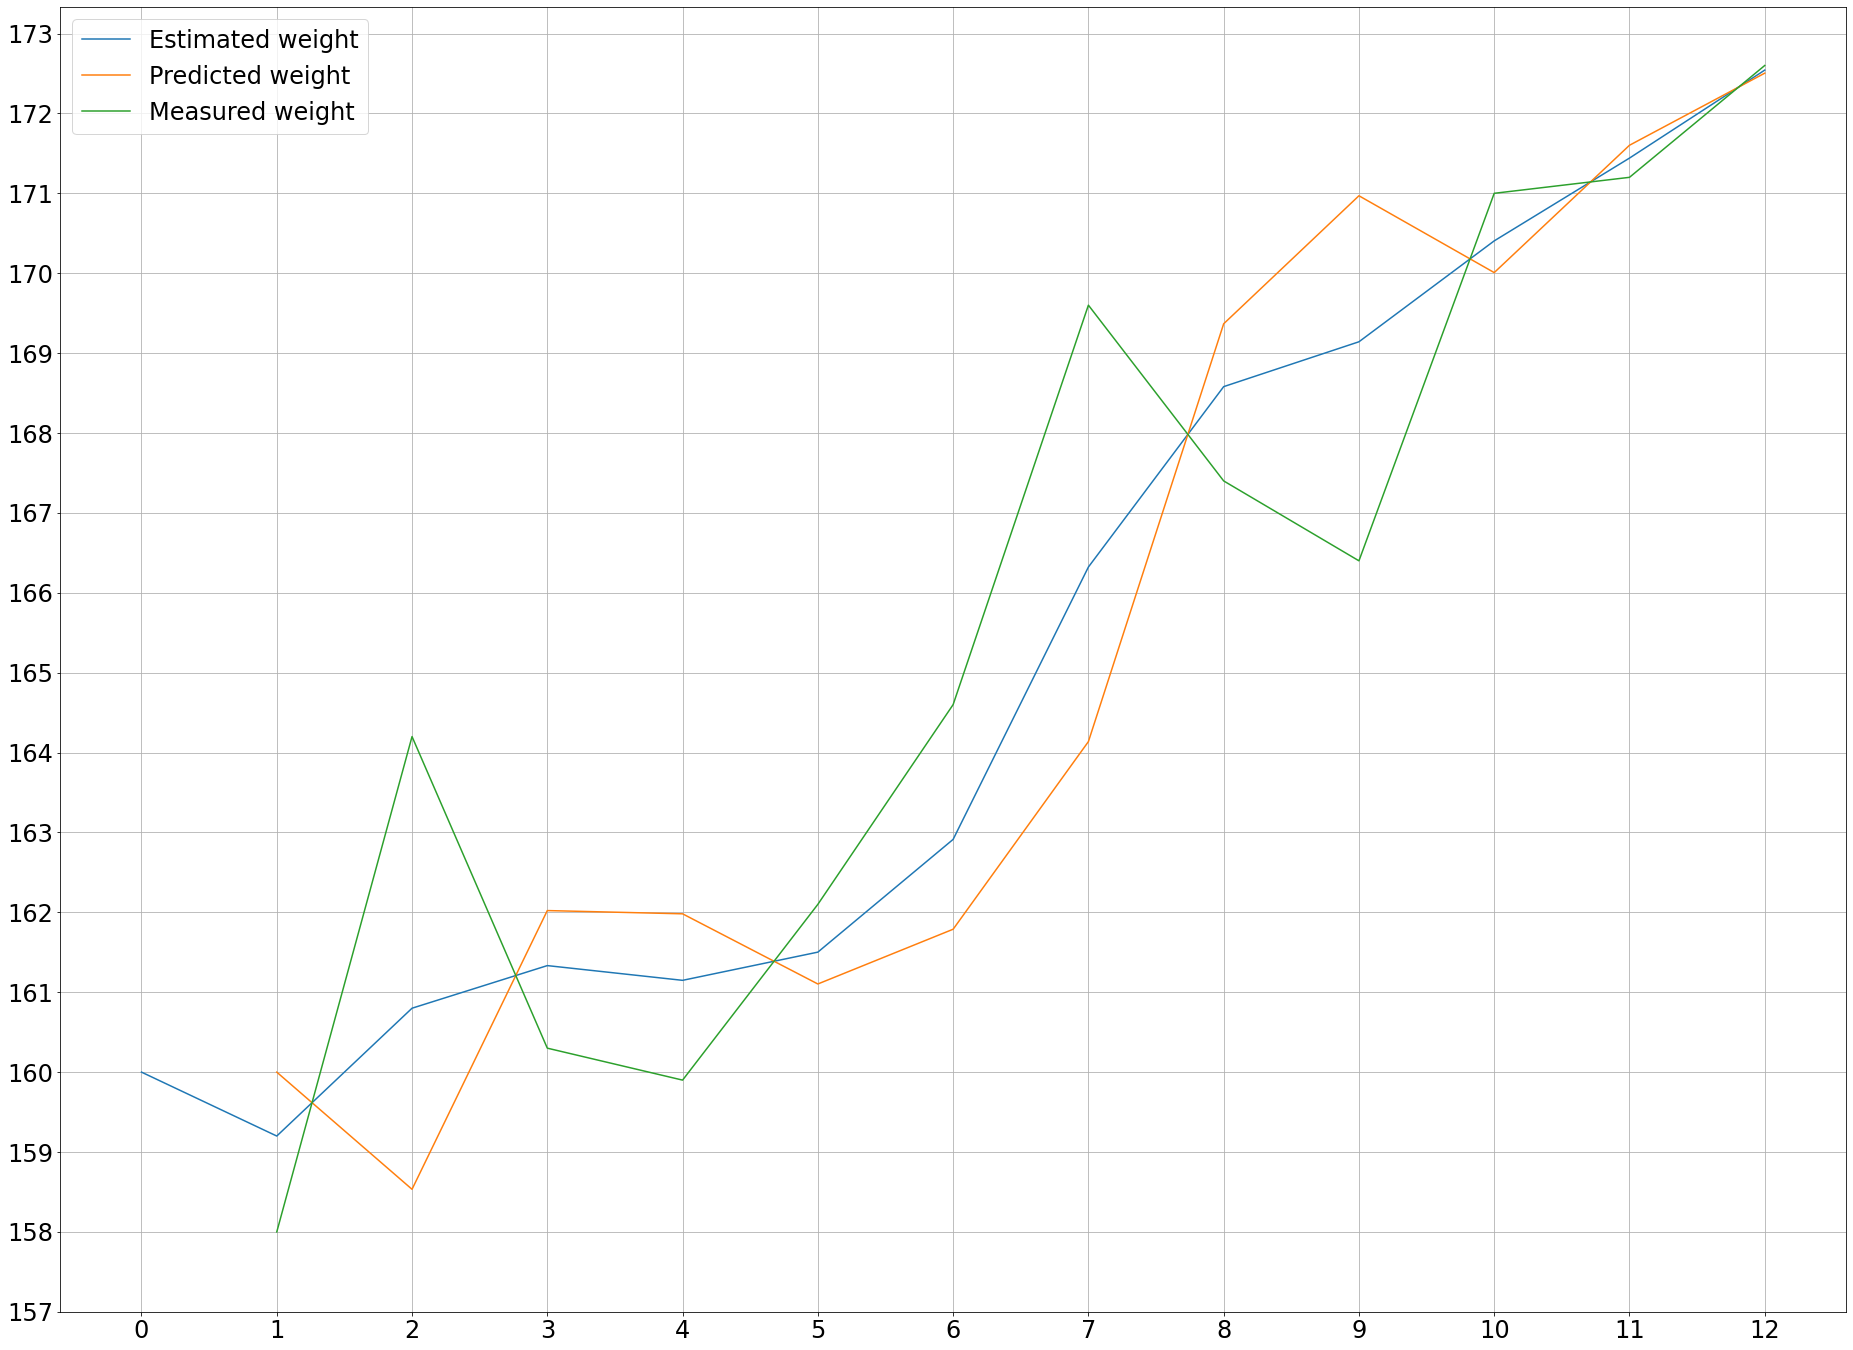

In [62]:
plt.plot(range(0, len(estimates)), estimates, label="Estimated weight")
plt.plot(range(1, len(predictions)+ 1),predictions,  label="Predicted weight")
plt.plot(range(1, len(measured_weights)+1), measured_weights, label="Measured weight")
plt.legend()
plt.rcParams["figure.figsize"] = (32, 24)
plt.grid(True, which="both", axis="both", )
plt.legend(fontsize=24)
plt.xticks(np.arange(0, len(estimates), 1), np.arange(0, len(estimates), 1), fontsize=24)
plt.yticks(np.arange(157, 174, 1), fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.show()

In [55]:
plt.rcParams["figure.figsize"]

[32.0, 24.0]

In [63]:
gain_scale_factor = 1. / 3.
scale_factor = 4.0 / 10

def predict_using_gain_estimate(estimated_weight, estimated_gain, do_print=False):
    estimates_weight, estimates_gain, predictions = [estimated_weight], [estimated_gain], []

    for measured_weight in measured_weights:
        # prediction based on previous estimate
        predicted_weight = estimated_weight + estimated_gain * time_step

       # estimation step
        residual = measured_weight - predicted_weight
        correction = scale_factor * residual
        estimated_weight = predicted_weight + correction

        estimated_gain = estimated_gain + gain_scale_factor * residual / time_step

        estimates_weight.append(estimated_weight)
        estimates_gain.append(estimated_gain)
        predictions.append(predicted_weight)

        if do_print:
            print(f"Measured weight: {measured_weight:.2f}, "
                  f"Predicted weight: {predicted_weight:.2f}, "
                  f"Residual: {residual:.2f}, "
                  f"Correction: {correction:.2f}, "
                  f"Estimated gain: {estimated_gain:.2f}, "
                  f"Estimated weight: {estimated_weight:.2f}")

    return estimates_weight, predictions

initial_estimate = 160.0
initial_gain = .0

estimates, predictions = predict_using_gain_estimate(initial_estimate, initial_gain, do_print=True)

Measured weight: 158.00, Predicted weight: 160.00, Residual: -2.00, Correction: -0.80, Estimated gain: -0.67, Estimated weight: 159.20
Measured weight: 164.20, Predicted weight: 158.53, Residual: 5.67, Correction: 2.27, Estimated gain: 1.22, Estimated weight: 160.80
Measured weight: 160.30, Predicted weight: 162.02, Residual: -1.72, Correction: -0.69, Estimated gain: 0.65, Estimated weight: 161.33
Measured weight: 159.90, Predicted weight: 161.98, Residual: -2.08, Correction: -0.83, Estimated gain: -0.05, Estimated weight: 161.15
Measured weight: 162.10, Predicted weight: 161.10, Residual: 1.00, Correction: 0.40, Estimated gain: 0.29, Estimated weight: 161.50
Measured weight: 164.60, Predicted weight: 161.79, Residual: 2.81, Correction: 1.12, Estimated gain: 1.22, Estimated weight: 162.91
Measured weight: 169.60, Predicted weight: 164.14, Residual: 5.46, Correction: 2.19, Estimated gain: 3.04, Estimated weight: 166.32
Measured weight: 167.40, Predicted weight: 169.37, Residual: -1.97, 

In [135]:
def g_h_filter(data, x0, dx0, g, h, dt):
    """
    Performs g-h filter on 1 state variable with a fixed g and h

    'data' contains the data to be filtered
    'x0' is the initial value for our state variable
    'dx' is the initial change rate for our state variable
    'g' is the g-scale factor (0 = constant gain, 1
    'h' is the h-scale factor (0 = prediction, 1 = measurement)
    """
    x, dx, p = [x0], [dx0], []
    x_t, dx_t = x0, dx0
    for z in data:
        # Prediction based on previous state
        p_t = x_t + dx_t * dt

        # Estimation of state based on prediction p_t and measurement z
        x_t = p_t + g * (z - p_t)

        # Update gain rate
        dx_t = dx_t + h * (z - p_t) / dt

        # Add to lists
        x.append(x_t)
        dx.append(dx_t)
        p.append(p_t)

    return x, dx, p

In [132]:
def f(x):
    return x * (16. - x)

def df(x):
    return -2. * x + 16.

def f_noisy(x):
    return f(x) + np.random.normal(loc=0., scale=5., size=len(x))

In [140]:
t = np.arange(1, 17, 1)
t0 = np.arange(0, 17, 1)
measurements = f_noisy(t)
x_est, dx, x_pred = g_h_filter(data=measurements, x0=1.5, dx0=0.5, g=0.1, h=0.1, dt=1.)

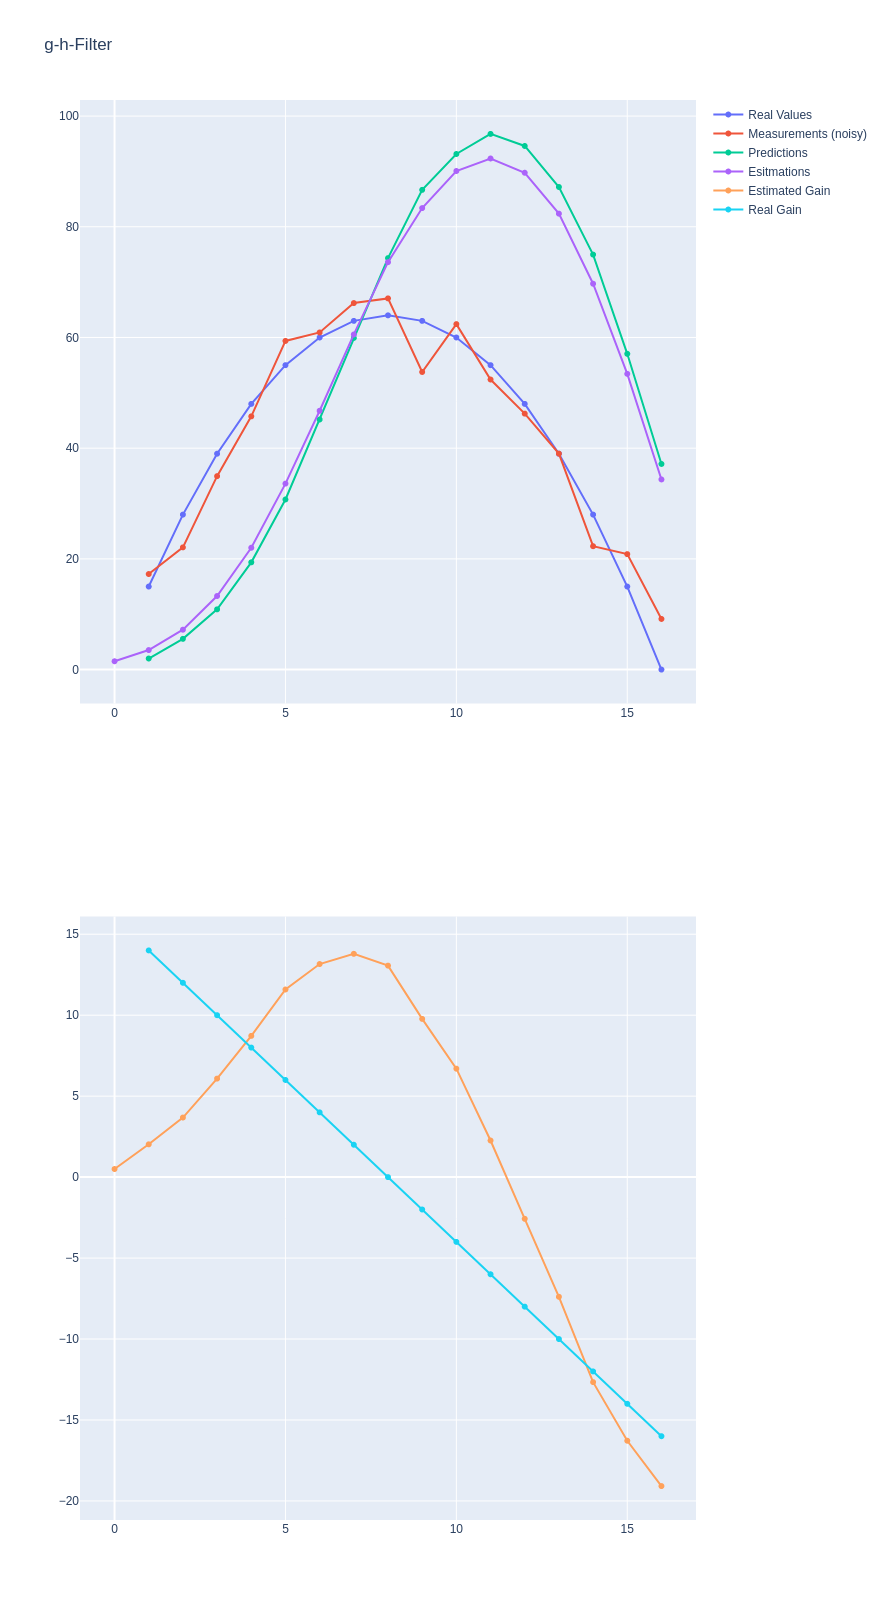

In [141]:
fig = make_subplots(
    rows=2,
    cols=1,
)

fig.add_scatter(x=t, y=f(t), name='Real Values', row=1, col=1)
fig.add_scatter(x=t, y=measurements, name='Measurements (noisy)', row=1, col=1)
fig.add_scatter(x=t, y=x_pred, name='Predictions', row=1, col=1)

fig.add_scatter(x=t0, y=x_est, name ='Esitmations', row=1, col=1)
fig.add_scatter(x=t0, y=dx, name='Estimated Gain', row=2, col=1)
fig.add_scatter(x=t, y=df(t), name='Real Gain', row=2, col=1)

(
    fig
    .update_layout(
        title="g-h-Filter",
        showlegend=True,
        width=1200,
        height=1600,
    )
    .update_traces(
        mode="lines+markers",
    )
)

In [176]:
def x(x0, dx_dt, dt):
    return  x0 + dx_dt * dt

def z(x):
    return x + np.random.randn() * 500

def gen_data(x0, dx_dt, T):
    zs = []
    xs = []
    xt = x0
    for t in range(T):
        xt = x(xt, dx_dt, 1.)
        zt = z(xt)
        xs.append(xt)
        zs.append(zt)
        dx_dt += 0.2
    return np.array(zs), np.array(xs)


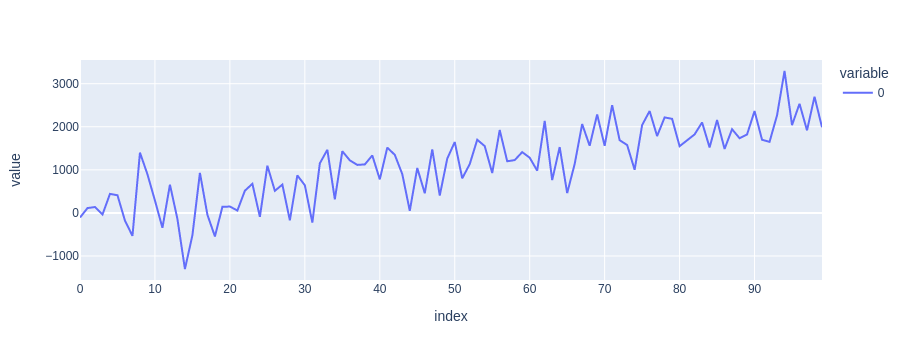

In [181]:
zs, xs = gen_data(23., 15., 100)
px.line(zs)

In [182]:
ts = np.arange(1, len(zs) + 1, 1)
t0s = np.arange(0, len(zs), 1)

x_est, dx, x_pred = g_h_filter(data=zs, x0=23., dx0=15., g=0.01, h=0.002, dt=1.)

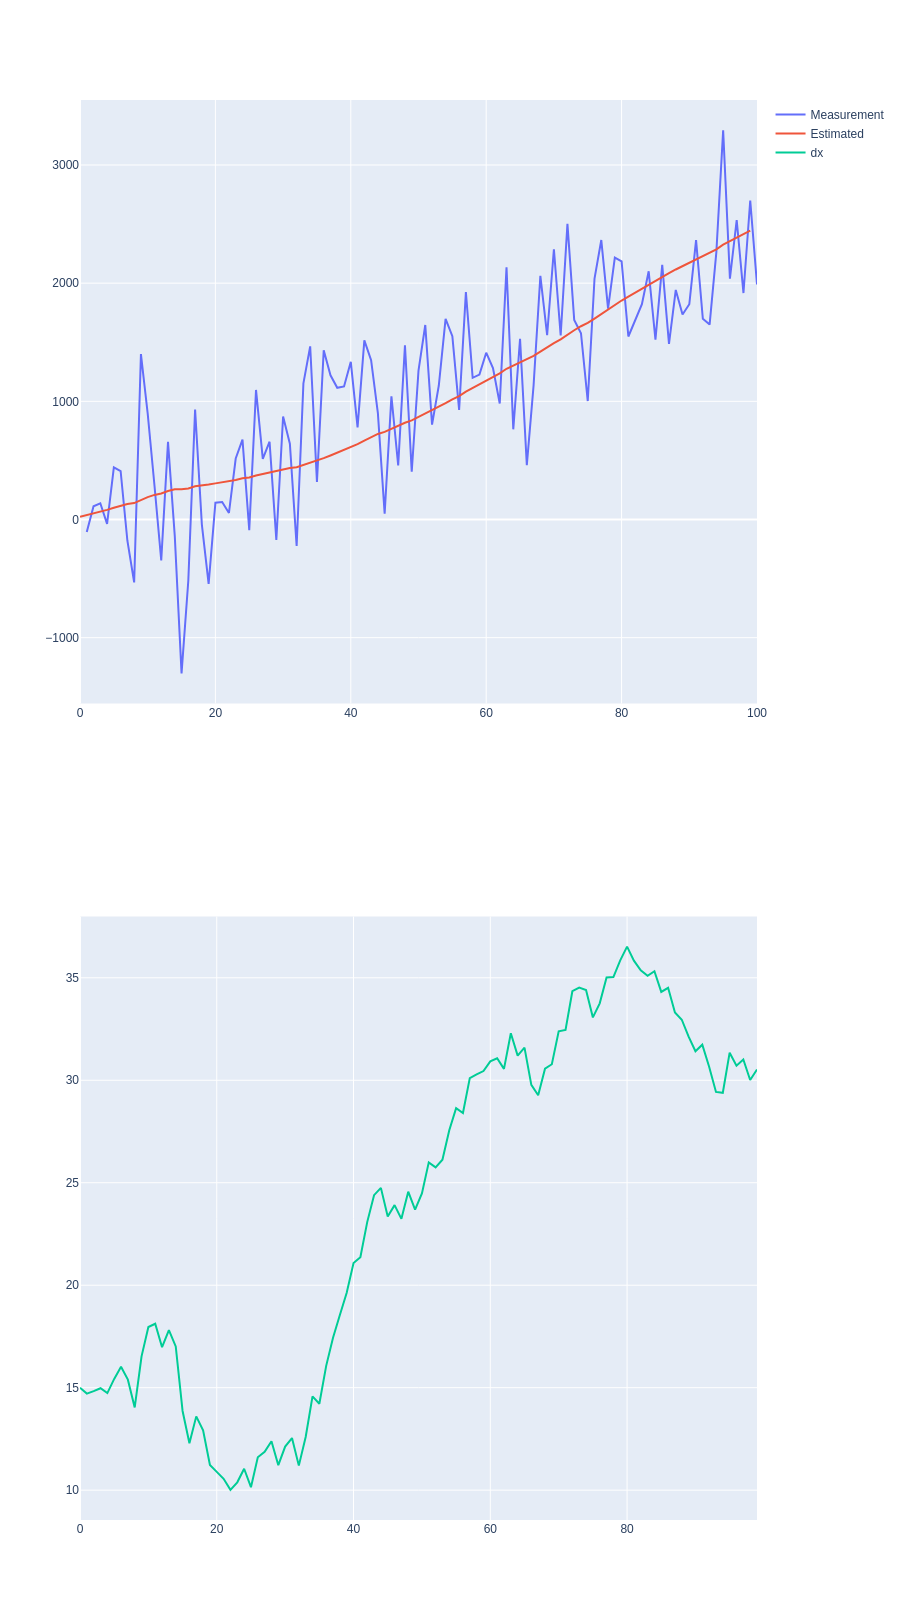

In [183]:
fig = make_subplots(rows=2, cols=1)

fig.add_scatter(x=ts, y=zs, row=1, col=1, name='Measurement')
fig.add_scatter(x=t0s,y=x_est, row=1, col=1, name='Estimated' )
fig.add_scatter(x=t0s, y=dx, row=2, col=1, name='dx')
(
    fig
    .update_layout(
        width = 1300,
        height = 1600,
        showlegend=True,
    )
)

In [185]:
f = GHFilter(x=0., dx=0., dt=1., g=.8, h=.2)

In [189]:
f.update(z=1.2)

(1.248, 0.192)

In [191]:
f.x

1.248

In [193]:
f.dx

0.192

## Discrete Bayes Filter
https://nbviewer.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/02-Discrete-Bayes.ipynb

In [6]:
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0]) # 1: door, 0: wall
belief = np.array([1/10]*10) # priori
hallway, belief

(array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [7]:
def plot_belief(belief):
    fig = px.bar(x=np.arange(len(belief)), y=belief, range_y=[0, 1])
    fig.update_layout(xaxis = dict(dtick=1))
    fig.show()

In [37]:
# prior
def reset_belief():
    belief = np.array([1/10] * 10)
    return belief

def set_belief(n):
    belief = np.zeros(10)
    belief[n] = 1.
    return belief

# posterior / update / estimation
def lh_hallway(hall, z, z_acc):
    scale = z_acc / (1. - z_acc)
    likelihood = np.ones_like(hall, dtype='float64')
    likelihood[hall==z] *= scale
    return likelihood

def update_belief_measurement(hall, belief, z, z_acc):
    likelihood = lh_hallway(hall, z, z_acc)
    belief = belief * likelihood
    belief = belief / np.sum(belief)
    return belief

def update_belief_movement(hall, belief, move, p_under, p_correct, p_over):
    new_belief = np.zeros(10)
    for i in range(len(belief)):
        new_belief[i] = (
            belief[(i - (move - 1)) % 10] * p_under +
            belief[(i - (move - 0)) % 10] * p_correct +
            belief[(i - (move + 1)) % 10] * p_over
        )
    return new_belief



In [32]:
belief = update_belief_measurement(hallway, belief, 1., 0.75)
plot_belief(belief)

In [45]:
belief = set_belief(2); plot_belief(belief)

In [46]:
belief = update_belief_movement(hallway, belief, 1, 0.0, 0.9, 0.1)
plot_belief(belief)
np.sum(belief)

1.0

In [38]:
belief = reset_belief()
plot_belief(belief)

In [39]:
belief = update_belief_measurement(hallway, belief, 1, 0.95); plot_belief(belief)

In [40]:
belief = update_belief_movement(hallway, belief, 1, 0.1, 0.8, 0.1); plot_belief(belief)

In [41]:
belief = update_belief_measurement(hallway, belief, 1, 0.95); plot_belief(belief)

In [42]:
np.sum(belief)

0.9999999999999999

## Generalizing with Convolution

In [55]:
def predict_move_convolution(pdf, offset, kernel):
    N = len(pdf)
    kN = len(kernel)
    width = int(kN / 2)
    result = np.zeros(N)
    for i in range(N):
        for j in range(kN):
            result[i] += pdf[(i - (offset + j - width)) % N] * kernel[j]

    return result

KeyboardInterrupt: 

In [64]:
belief = set_belief(4)
belief = predict_move_convolution(belief, 1, [0.1, 0.8, 0.05, 0.05])
plot_belief(belief); np.sum(belief)

1.0000000000000002

In [61]:
np.sum(belief)

1.0000000000000002

In [65]:
from filterpy.discrete_bayes import predict

In [68]:
belief = [.05, .05, .05, .7, .05, .05, 0.05]
px.bar(belief, range_y=[0,1])

In [70]:
prior = predict(belief, -1, [0.1, 0.8, 0.2])
px.bar(prior, range_y=[0,1])

## Simulating Train Behavior

In [ ]:
class Train(object):

    def __init__(self, track_len, kernel=[1.], sensor_acc=0.9):
        self.track_len = track_len
        self.pos = 0
        self.kernel = kernel
        self.sensor_acc = sensor_acc

    def move(self, distance=1):
        self.pos += distance
        r = random.random()
